<a id="logo"></a>
![NOVA IMS LOGO](https://www.novaims.unl.pt/images/logo.png)


<br>
<hr>


<h2 style="color:blue"> Table of contents</h2>

<br>

1. [Data Import](#import)
2. [Data Exploration](#explore)<br>
3. [Data Cleaning](#clean)
4. [Data Transformation](#transform)
5. [Data Reduction](#reduce)
6. [Data Clustering](#cluster)

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



In [25]:
import os
while not os.getcwd().endswith("Group Report"):
    os.chdir("..")
    
# detect changes on folders
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from src.data_curation import summary

## 1. [Import Data](#import)
<a id="import"></a>

In [4]:
df_demo = pd.read_excel('Material/demographic.xlsx')
df_demo_numeric_cols = df_demo.select_dtypes(include='number').columns
df_demo_object_cols = df_demo.select_dtypes(include='object').columns
df_firmo = pd.read_csv('Material/firmographic.csv')
df_firmo_numeric_cols = df_firmo.select_dtypes(include='number').columns
df_firmo_object_cols = df_firmo.select_dtypes(include='object').columns


In [35]:
df_demo_float_cols = df_demo.select_dtypes(include='float').columns
df_demo_int_cols = df_demo.select_dtypes(include='int64').columns
df_firmo_float_cols = df_firmo.select_dtypes(include='float').columns
df_firmo_int_cols = df_firmo.select_dtypes(include='int64').columns

In [54]:
demo_int_object_cols=list(df_demo_int_cols)+list(df_demo_object_cols)
demo_int_object_cols.remove("Name")
demo_int_object_cols.remove("Card_ID")
firmo_int_object_cols=list(df_firmo_int_cols)+list(df_firmo_object_cols)
firmo_int_object_cols.remove("Card_ID")

In [12]:
@interact
def head_df(data=['demographic','firmographic'], n=(1, 20, 1)):
    if data == 'demographic':
        df = df_demo
    else:
        df= df_firmo
    return df.head(n)

interactive(children=(Dropdown(description='data', options=('demographic', 'firmographic'), value='demographic…

## 2. [Data Exploration](#explore)
<a id="explore"></a>

In [7]:
@interact
def databases_summary(data=['demographic','firmographic']):
    if data == 'demographic':
        df = df_demo
    else:
        df= df_firmo
    return summary(df)

interactive(children=(Dropdown(description='data', options=('demographic', 'firmographic'), value='demographic…

<h3 style="color:blue"> 2.1 Data Model</h3>

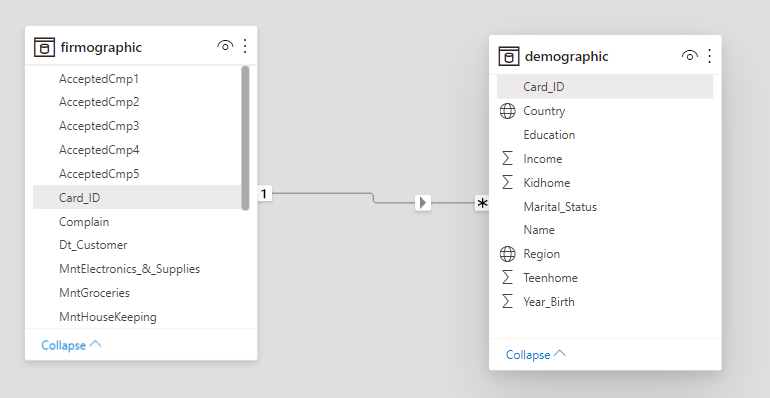

<h3 style="color:blue"> 2.2 Univariate Analysis</h3>

<br>

<h4 style="color:blue"> 2.2.1 Demographic</h4>

##### Float type columns

In [38]:
@interact
def float_cols(column=df_demo_float_cols):
    df_demo.boxplot(column=column)
    plt.title(column + ' Box plot')
    plt.show()
    

interactive(children=(Dropdown(description='column', options=('Income',), value='Income'), Output()), _dom_cla…

##### Integer and object type columns

In [53]:
@interact
def integer_cols(column=demo_int_object_cols):
    aux = column.capitalize()
    df_demo[column].value_counts(normalize=True).reset_index().rename(columns={'index':aux,column:'Value Counts'}).plot.bar(x=column.capitalize(),y='Value Counts')
    plt.xlabel(column.capitalize())
    plt.ylabel('% Occurrences')
    plt.title(column.capitalize()+' Bar Chart')
    plt.show()

interactive(children=(Dropdown(description='column', options=('Year_Birth', 'Kidhome', 'Teenhome', 'Education'…

<br>

<h4 style="color:blue"> 2.2.2 Firmographic</h4>

##### Float type columns

In [56]:
@interact
def float_cols(column=df_firmo_float_cols):
    df_firmo.boxplot(column=column)
    plt.title(column + ' Box plot')
    plt.show()

interactive(children=(Dropdown(description='column', options=('MntGroceries', 'MntStationery', 'MntHouseKeepin…

##### Integer and object type columns

In [57]:
@interact
def integer_cols(column=firmo_int_object_cols):
    aux = column.capitalize()
    df_firmo[column].value_counts(normalize=True).reset_index().rename(columns={'index':aux,column:'Value Counts'}).plot.bar(x=column.capitalize(),y='Value Counts')
    plt.xlabel(column.capitalize())
    plt.ylabel('% Occurrences')
    plt.title(column.capitalize()+' Bar Chart')
    plt.show()

interactive(children=(Dropdown(description='column', options=('Recency', 'NumDealsPurchases', 'NumWebPurchases…